# **0. Importação e visualização dos dados**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dataset_avaliacoes.csv', sep=',')
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [ ]:
# Quantidade de avaliações
df.shape

(15501, 4)

In [ ]:
# Quantidade de valores positivos e negativos
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [ ]:
# Uma avaliação positiva
df.avaliacao[0]

'Esse smartphone superou minhas expectativas, recomendo'

In [ ]:
# Uma avalição negativa
df.avaliacao[2]

'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

# **1. Transformando textos em dados numéricos**

In [ ]:
# Entendendo o CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Método conta a quantidade de vezes que uma determinada palavra apareceu
texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']
vetorizador = CountVectorizer()
bag_of_words = vetorizador.fit_transform(texto)

In [ ]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

A grande vantagem da técnica Bag of Words é sua simplicidade. Ela transforma textos em números, facilitando a análise e processamento por algoritmos de aprendizado de máquina. No entanto, a simplicidade também traz limitações: como o Bag of Words não considera a ordem das palavras, ele pode ignorar aspectos importantes do contexto e do significado do texto.

In [ ]:
# Conversão da matriz para DF
# Visualização do funcionamento do CountVectorizer
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizador.get_feature_names_out())
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

In [ ]:
# Aplicando no df o CountVectorizer
vetorizador = CountVectorizer(lowercase=False)
bag_of_words = vetorizador.fit_transform(df.avaliacao)

# Quantidade de colunas: 23352 - Inviável
print(bag_of_words.shape)

(15501, 23352)


In [ ]:
# Aplicando no df o CountVectorizer
vetorizador = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizador.fit_transform(df.avaliacao)

# Quantidade de colunas: 50
print(bag_of_words.shape)

(15501, 50)


In [ ]:
# Visualizando as novas colunas
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(
    bag_of_words,
    columns=vetorizador.get_feature_names_out()
)

matriz_esparsa

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

# **1.1 Classificando os sentimentos**

In [ ]:
# Regressão logística, já quê, o nosso Y vai ser uma resposta: 'Positivo' ou 'Negativo'
from sklearn.model_selection import train_test_split

# Separação das variáveis de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(
    bag_of_words,
    df.sentimento,
    random_state=4978
)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criação do modelo e treinamento dos dados
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_train, y_train)

# Acurácia - Basicamento o modelo está acertando 79.82%, o que é até um valor muito bom
acuracia = regressao_logistica.score(X_test, y_test) * 100
print(f'Acurácia: {acuracia:.2f}')

Acurácia: 79.82


In [ ]:
# Função que faz o passo-a-passo anterior
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

# **1.1 Visualizando as palavras mais usadas nas avaliações**

In [ ]:
from wordcloud import WordCloud

In [ ]:
todas_palavras = [texto for texto in df.avaliacao]
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [ ]:
# Único texto contendo todas as avaliações
todas_palavras = ' '.join(texto for texto in df.avaliacao)
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [ ]:
nuvem_palavras = WordCloud().generate(todas_palavras)

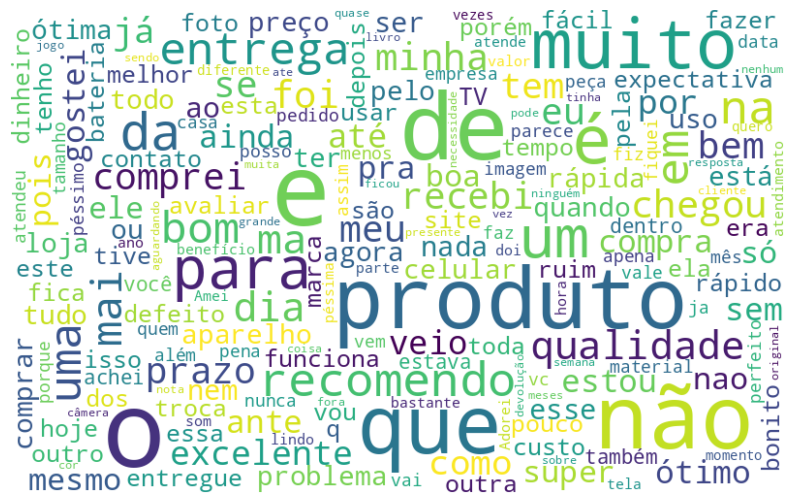

In [ ]:
import matplotlib.pyplot as plt

nuvem_palavras = WordCloud(width=800,height=500, max_font_size=110, collocations=False, background_color='white').generate(todas_palavras)

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Função que gera a nuvem tendo como parâmetro o texto, a coluna e o sentimento
def nuvem_palavras(texto, coluna_texto, sentimento):
  texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]

  texto_unido = ' '.join(texto for texto in texto_sentimento)

  nuvem_palavras = WordCloud(width=800,height=500, max_font_size=110, collocations=False, background_color='white').generate(texto_unido)
  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

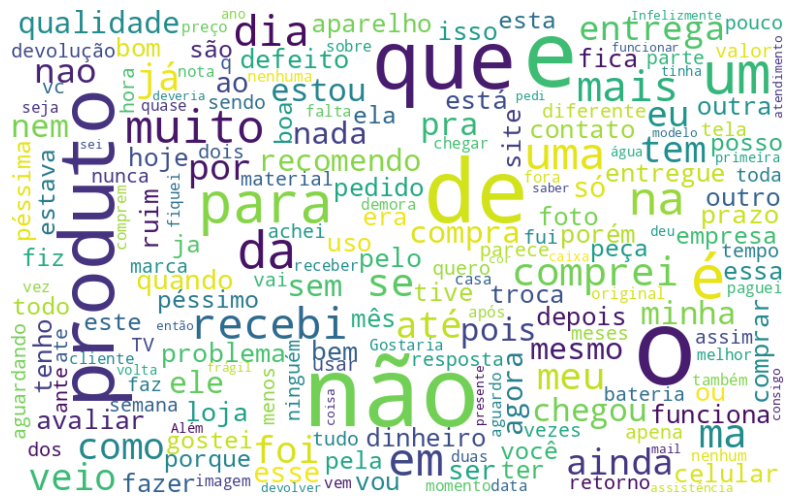

In [ ]:
 # Nuvem para avaliações negativas
 nuvem_palavras(df,'avaliacao','negativo')

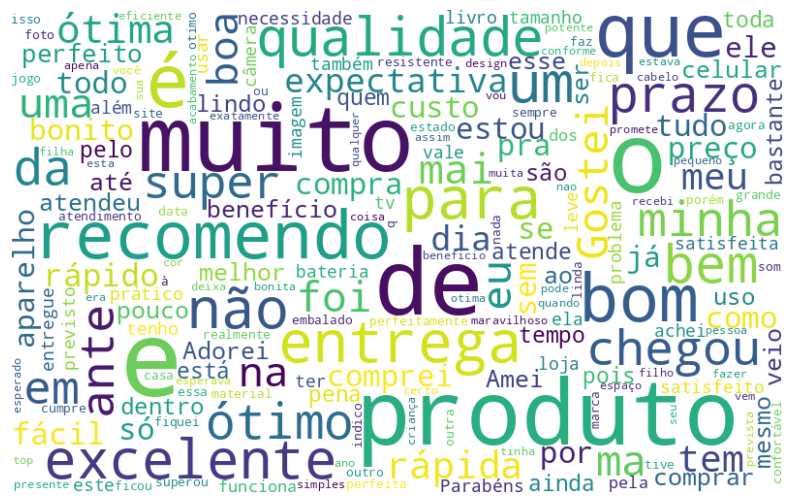

In [ ]:
# Nuvem para avaliações positivas
nuvem_palavras(df,'avaliacao','positivo')

# **2. Tokenização**

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
from nltk import tokenize

In [ ]:
token_espaco = tokenize.WhitespaceTokenizer()

In [ ]:
token_frase = token_espaco.tokenize(todas_palavras)
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [ ]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [ ]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia': list(frequencia.values())})
df_frequencia.nlargest(columns='Frequencia', n=10)

Palavra  Frequencia
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

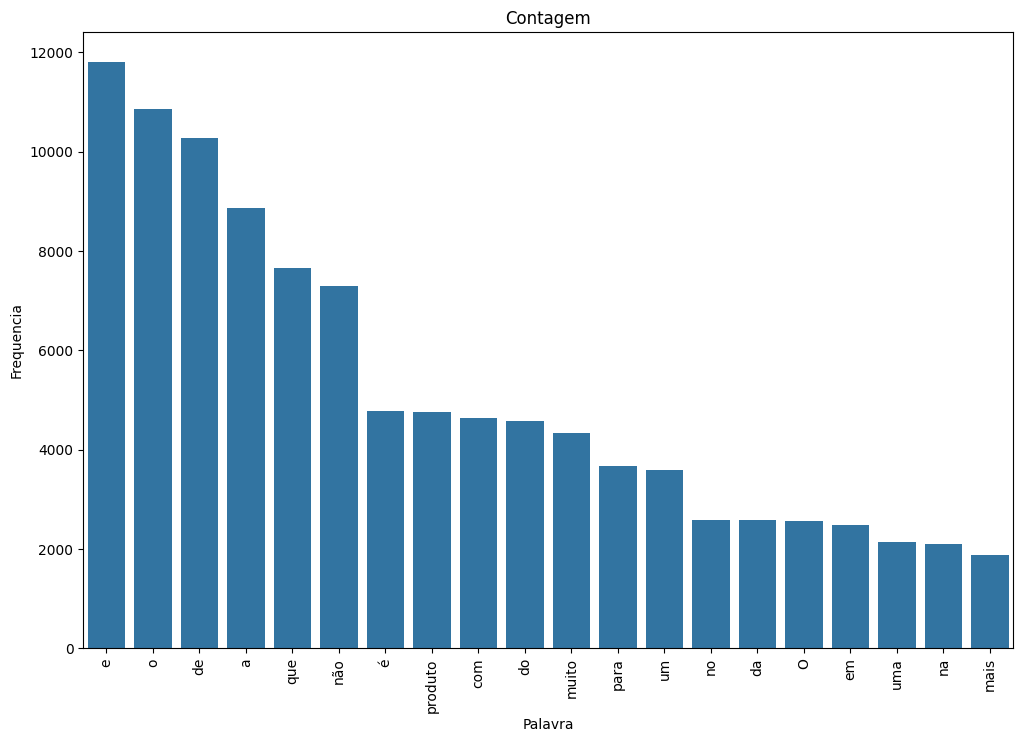

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Contagem')
sns.barplot(x='Palavra', y='Frequencia', data=df_frequencia.nlargest(columns='Frequencia', n=20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
def grafico_frequencia(texto, coluna_texto, quantidade):
    # Juntando todos os textos em uma única string
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])

    # Calculando a frequência das palavras
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))

    # Criando um DataFrame com as palavras e suas frequências
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})

    # Selecionando as palavras mais frequentes
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)

    # Criando o gráfico de barras
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", color='gray')
    ax.set(ylabel="Contagem")

    # Exibindo o gráfico
    plt.show()

Necessário fazer um tratamento nesse texto

# **3. Limpando e normalizando dados textuais**

## **3.1 Removendo os stopwords**

In [ ]:
# Removendo os stopwords
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [ ]:
# Removendo os stopwords
frase_processada = []

for opiniao in df.avaliacao:
    palavras_texto = token_espaco.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

In [ ]:
# Apenas removendo as stopwords houve uma melhora da acurácia
classificar_texto(df, 'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.09%


## **3.2 Removendo as pontuações**

In [ ]:
# Removendo pontuação
frase_processada = []

token_pontuacao = tokenize.WordPunctTokenizer()

for opiniao in df.tratamento_1:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [ ]:
classificar_texto(df, 'tratamento_2', 'sentimento')

Acurácia do modelo com 'tratamento_2': 81.09%


In [ ]:
! pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.8 MB/s eta 0:00:00


## **3.3 Removendo acentuação**

In [ ]:
# Removendo acentuação
import unidecode

sem_acento = [unidecode.unidecode(texto) for texto in df.tratamento_2]
df['tratamento_3'] = sem_acento
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [ ]:
df['tratamento_3'] = sem_acento

frase_processada = []

for opiniao in df['tratamento_3']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  
0     Esse smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [ ]:
# Melhora de acurácia pós remoção dos acentos
classificar_texto(df, 'tratamento_3', 'sentimento')

Acurácia do modelo com 'tratamento_3': 82.04%


## **3.4 Uniformizando o texto**

In [ ]:
# Uniformização do texto
frase_processada = []

for opiniao in df.tratamento_3:
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  
0          smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...

In [ ]:
# Melhora de acurácia pós uniformização do texto
classificar_texto(df, 'tratamento_4', 'sentimento')

Acurácia do modelo com 'tratamento_4': 83.75%


# **4. Simplificando as palavras**

In [ ]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('gostei')

'gost'

In [ ]:
frase_processada = []

for opiniao in df.tratamento_4:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_5'] = frase_processada
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  \
0          smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  fiz compra loja entregou produto compra feita ...   
3  atendeu expectativas achei luz ruim nada dific...   
4  gostei achei ficou desejar qualidade fotos ach...   

                                        tratamento_5  
0                       smartphon super expect recom  
1              cheir desagrada pra incomod recomendo  
2  fiz compr loj entreg produt compr feit carta c...  
3     atend expect ach luz ruim nad dificult funcion  
4         gost ach fic desej qual fot ach bem melhor

In [ ]:
classificar_texto(df, 'tratamento_5', 'sentimento')

Acurácia do modelo com 'tratamento_5': 85.11%


# **5. Determinando a importância das palavras**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [ ]:
# Traz importancia para as palavras
tfidf_bruto = tfidf.fit_transform(df["avaliacao"])

In [ ]:
tfidf_bruto = tfidf.fit_transform(df["avaliacao"])
x_treino, x_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df["sentimento"], random_state=4978)
regressao_logistica.fit(x_treino, y_treino)
acuracia_tfidf_bruto = regressao_logistica.score(x_teste, y_teste)
print(f"Acurácia do modelo: {acuracia_tfidf_bruto *100:.2f}%")

Acurácia do modelo: 79.54%


In [ ]:
tfidf_tratados = tfidf.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_tratados *100:.2f}%')

Acurácia do modelo: 85.14%


# **6. Capturando contextos**

In [ ]:
from nltk import ngrams

In [ ]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_50 = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_50 *100:.2f}%')

Acurácia do modelo: 85.22%


# **7. Explorando a quantidade de features na vetorização**

In [ ]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_100 = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_100 *100:.2f}%')

Acurácia do modelo: 88.21%


In [ ]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_1000 = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_1000 *100:.2f}%')

Acurácia do modelo: 91.85%


In [ ]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index=tfidf_1000.get_feature_names_out())

In [ ]:
# Valores positivos
pesos.nlargest(columns=0, n=50)

0
otim          7.808669
excel         7.449268
bom           5.990104
perfeit       5.078838
ador          5.034260
satisfeit     4.816196
rap           4.232814
lind          3.762726
ame           3.509609
maravilh      3.477517
boa           2.853934
expect        2.805352
bast          2.771108
surpreend     2.768510
sup           2.736121
recom         2.716303
gost          2.696611
bem           2.594271
facil         2.549400
conhec        2.494977
exat          2.457021
otim produt   2.280942
ant           2.250021
parab         2.242019
top           2.237539
ant praz      2.203972
obrig         2.099760
bonit         2.083441
facilit       2.025213
ideal         2.014983
amou          2.009027
gost produt   1.905817
produt excel  1.886860
unic          1.868087
necess        1.854163
atend         1.822574
incri         1.810025
tud           1.782914
bom produt    1.762308
acord         1.717719
feliz         1.682100
cheg ant      1.681544
conform       1.680358
produt otim   1.666303
sup recom     1.605002
melhor        1.584076
produt bom    1.553070
cert          1.542012
util          1.532237
duvid         1.525344

In [ ]:
# Valores negativos
pesos.nsmallest(columns=0, n=50)

0
pess         -4.632123
receb        -4.067055
ruim         -4.059795
frac         -3.694803
horri        -3.376634
defeit       -3.033516
fragil       -3.026329
decepcion    -2.899696
devolv       -2.893880
dinh         -2.692323
vei          -2.656039
pag          -2.417861
solt         -2.374786
quebr        -2.341997
ning         -2.289400
me           -2.270050
pess qual    -2.230152
receb produt -2.174370
tent         -2.135781
baix         -2.097195
devoluca     -2.093820
inferi       -2.082713
avali        -2.067197
insatisfeit  -2.063115
lig          -2.037871
rasg         -1.994937
baix qual    -1.984931
troc         -1.952566
queim        -1.881834
lent         -1.869798
fal          -1.868140
arrepend     -1.846433
fech         -1.836922
fot          -1.817790
porc         -1.810579
tr           -1.784346
cancel       -1.781236
hoj          -1.776404
mand         -1.772616
pi           -1.761921
sai          -1.756841
encaix       -1.736008
err          -1.730392
absurd       -1.728696
nad          -1.696266
produt       -1.694031
mes          -1.687258
mal          -1.685566
plac         -1.674567
diz          -1.634376

# **8. Salvando e carregando o modelo**

In [ ]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [ ]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
modelo = joblib.load('modelo_regressao_logistica.pkl')

# **9. Criando uma função para processar os novos dados**

In [ ]:
# Importa as palavras irrelevantes (stopwords) em português do corpus do NLTK
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

# Cria um tokenizador que separa o texto em palavras e pontuações (usando o modelo WordPunctTokenizer)
token_pontuacao = tokenize.WordPunctTokenizer()

# Inicializa um stemmer específico para a língua portuguesa (RSLP Stemmer)
stemmer = nltk.RSLPStemmer()

def processar_avaliacao(avaliacao):
    # Tokeniza a avaliação, quebrando o texto em palavras e pontuações
    tokens = token_pontuacao.tokenize(avaliacao)

    # Remove palavras irrelevantes (stopwords) que não agregam valor à análise
    frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

    # Remove tokens que não são palavras (por exemplo, números ou pontuações)
    frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

    # Remove acentuação e caracteres especiais das palavras (normaliza para o formato sem acento)
    frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

    # Aplica stemming nas palavras, reduzindo-as à sua raiz (removendo sufixos)
    frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

    # Junta as palavras processadas em uma string novamente, separadas por espaços
    return ' '.join(frase_processada)

# **10. Classificando novas avaliações**

## **10.1 Avaliações 1**

In [ ]:
# Novas avaliações para prever
novas_avaliacoes = ["Ótimo produto, super recomendo!",
                 "A entrega atrasou muito! Estou decepcionado com a compra",
                 "Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo",
                 "Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.",
                 '''Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade.
                 Mas, no fim, deu tudo certo e recebi o produto.Produto de ótima qualidade, atendendo bem as minhas necessidades e por
                 um preço super em conta.Recomendo.''']

In [ ]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [ ]:
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [ ]:
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({'Avaliação': novas_avaliacoes, 'Sentimento': predicoes})

df_previsoes

Avaliação Sentimento
0                    Ótimo produto, super recomendo!   positivo
1  A entrega atrasou muito! Estou decepcionado co...   negativo
2  Muito satisfeito com a compra. Além de ter ate...   positivo
3  Horrível!!! O produto chegou danificado e agor...   negativo
4  Rastreando o pacote, achei que não fosse receb...   positivo

## **10.2 Avaliações 2**

In [ ]:
#Carregar as novas avaliações
novas_avaliacoes = pd.read_csv('/content/novas_avaliacoes_2.csv', sep=',')

# Pré-processar as novas avaliações
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes['avaliacao']]

# Transformar as novas avaliações com o TfidfVectorizer carregado
novas_reviews_tfidf = tfidf.transform(novas_avaliacoes_processadas)

# Fazer a previsão dos sentimentos
predicoes = regressao_logistica.predict(novas_reviews_tfidf)

# Criar um DataFrame com as previsões
df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes['avaliacao'],
    'Sentimento Previsto': predicoes
})

df_previsoes

Avaliação Sentimento Previsto
0   Até que o sabor é bom. Muito melhor que tomar ...            positivo
1   Nossa sério, absurdo, compro o produto com rec...            negativo
2                                 Bom custo benefício            positivo
3   Saboroso e nutritivo. Tem me salvado nos dias ...            positivo
4   Fiquei decepcionada com a situação, a embalage...            negativo
5   Uma unidade do pacote veio furada e vazou em t...            negativo
6      Comprei em junho mas o produto venceu em março            negativo
7   Gente, o meu chegou todo certinho, eu tava com...            positivo
8   Gosto muito desse produto, ótima qualidade, e ...            positivo
9   Esse produto veio na quantidade que eu não ped...            negativo
10    TODOS VIERAM COM VENCIMENTO DE 3 MESES ATRÁS!!!            negativo